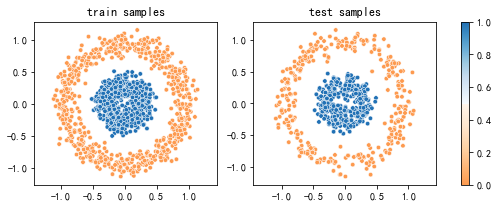

In [76]:
# # -*- coding: utf-8 -*-

# %matplotlib notebook
# %load 汇报
#加载所需的模块
from sklearn import datasets
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

np.random.seed(123)

#生成样本
X,y= datasets.make_circles(n_samples = 2000, factor=0.3, noise=.1)
# X,y = datasets.make_moons(n_samples=2000, noise=.1)
# X,y = datasets.make_gaussian_quantiles(n_classes=2,n_samples=2000)

#划分训练集和测试集
X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#最大最小标准化到0~255
ss = StandardScaler().fit(X)
X = ss.transform(X)/2
X_test = ss.transform(X_test)/2

#构建特征空间
c,r = np.mgrid[[slice(X.min(),X.max(),0.02)]*2]
p = np.c_[c.flat,r.flat]

#可视化
fig = plt.figure(figsize = (9,3))
#自定义cmap
top = cm.get_cmap('Oranges_r', 512)
bottom = cm.get_cmap('Blues', 512)
newcolors = np.vstack((top(np.linspace(0.55, 1, 512)),
                       bottom(np.linspace(0, 0.75, 512))))
cm_bright = ListedColormap(newcolors, name='OrangeBlue')

plt.subplot(121)
m1 = plt.scatter(*X.T,c = y,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
plt.title('train samples')
plt.axis('equal')
plt.subplot(122)
m2 = plt.scatter(*X_test.T,c = y_test,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
plt.title('test samples')
plt.axis('equal')
ax = fig.get_axes()
plt.colorbar(ax = ax)
plt.show()

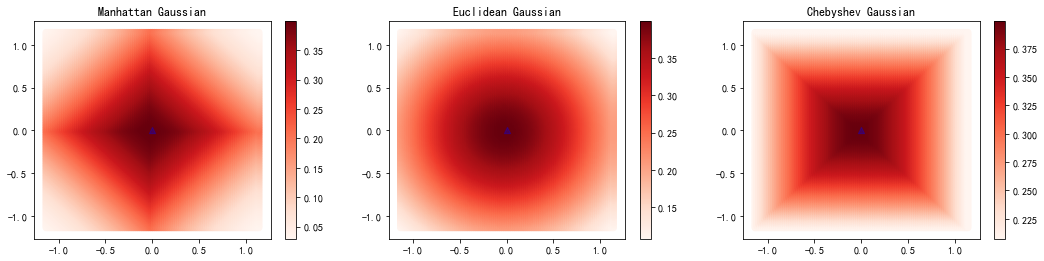

In [77]:
def gaussian(data,u,sigma):
    return np.exp(-(data-u)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)
# 任选一个初始点
origin_p = np.array([[0,0]])
dis_temp = p-origin_p
# 分别计算特征空间各点到初始点的距离
manha_dis = np.linalg.norm(dis_temp,ord=1,axis=1)
eu_dis = np.linalg.norm(dis_temp,ord=2,axis=1)
cheb_dis = np.linalg.norm(dis_temp,ord=np.inf,axis=1)
# 计算各点的标准正态分布概率
manha_Gauss = gaussian(manha_dis,0,1)
eu_Gauss = gaussian(eu_dis,0,1)
cheb_dis = gaussian(cheb_dis,0,1)
# 可视化
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))
cm1 = ax1.scatter(*p.T,c=manha_Gauss,cmap='Reds')
ax1.scatter(origin_p[0,0],origin_p[0,1],s=40, alpha=0.3, marker='^',c='b')
ax1.set_title('Manhattan Gaussian')
cm2 = ax2.scatter(*p.T,c=eu_Gauss,cmap = 'Reds')
ax2.scatter(origin_p[0,0],origin_p[0,1],s=40, alpha=0.3, marker='^',c='b')
ax2.set_title('Euclidean Gaussian')
cm3 = ax3.scatter(*p.T,c=cheb_dis,cmap = 'Reds')
ax3.scatter(origin_p[0,0],origin_p[0,1],s=40, alpha=0.3, marker='^',c='b')
ax3.set_title('Chebyshev Gaussian')
plt.colorbar(cm1,ax=ax1)
plt.colorbar(cm2,ax=ax2)
plt.colorbar(cm3,ax=ax3)

In [88]:
def Distance_gaussian(origin_data,data_space,dis_type='eu',dis_return=False):
    dis_tem = data_space-origin_data
    if dis_type == 'eu':
        ord=2
    elif dis_type == 'ma':
        ord=1
    elif dis_type =='ch':
        ord = np.inf
    else:
        print('Not finished')
        raise ValueError
    dis = np.linalg.norm(dis_tem,ord=ord,axis=1)
    if dis_return:
        return dis
    else:
        return gaussian(dis,0,1)

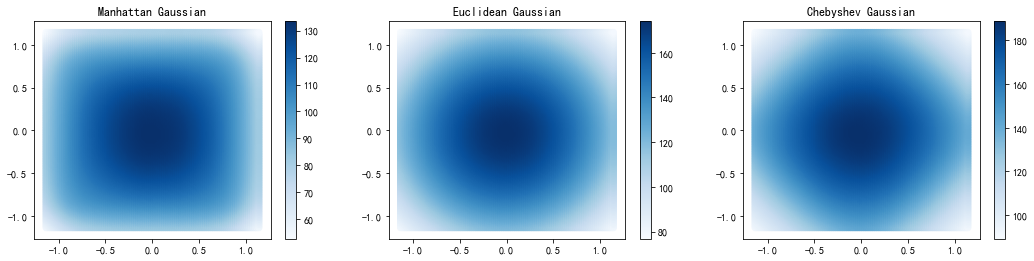

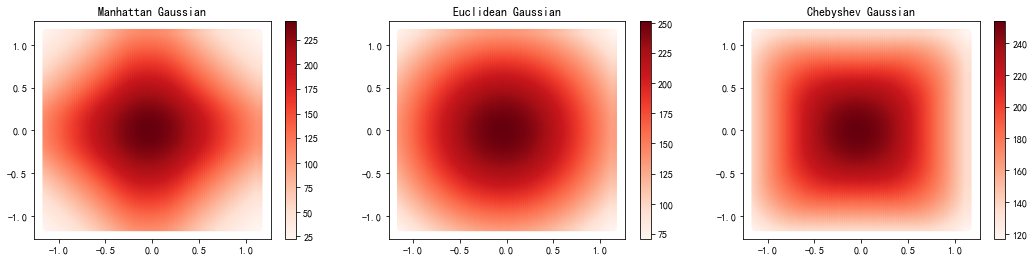

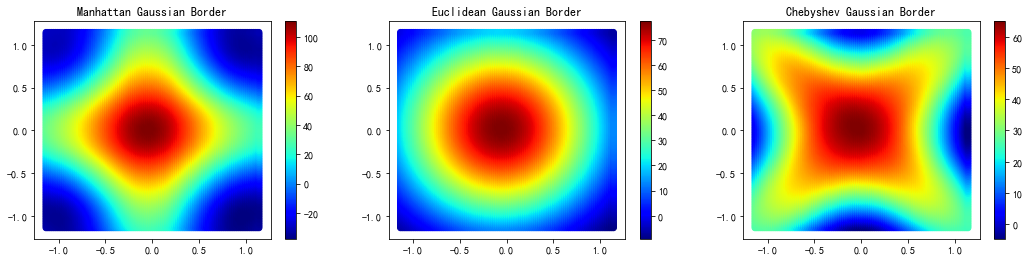

In [83]:
# 绘制多个点对特征空间的影响
def draw_X_gaussian(X_F,cmap='Oranges'):
    p_F_eu = []
    p_F_ma = []
    p_F_ch = []
    for i in range(X_F.shape[0]):
        p_F_eu.append(Distance_gaussian(X_F[i,:],p,'eu'))
        p_F_ch.append(Distance_gaussian(X_F[i,:],p,'ch'))
        p_F_ma.append(Distance_gaussian(X_F[i,:],p,'ma'))
    p_F_eu_sum = np.array(p_F_eu).sum(axis=0)
    p_F_ch_sum = np.array(p_F_ch).sum(axis=0)
    p_F_ma_sum = np.array(p_F_ma).sum(axis=0)
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))
    cm1 = ax1.scatter(*p.T,c=p_F_ma_sum,cmap=cmap)
    # ax1.scatter(*X_F.T,s=40, alpha=0.3, marker='^',c='b')
    ax1.set_title('Manhattan Gaussian')
    cm2 = ax2.scatter(*p.T,c=p_F_eu_sum,cmap =cmap)
    # ax2.scatter(*X_F.T,s=40, alpha=0.3, marker='^',c='b')
    ax2.set_title('Euclidean Gaussian')
    cm3 = ax3.scatter(*p.T,c=p_F_ch_sum,cmap =cmap)
    # ax3.scatter(*X_F.T,s=40, alpha=0.3, marker='^',c='b')
    ax3.set_title('Chebyshev Gaussian')
    plt.colorbar(cm1,ax=ax1)
    plt.colorbar(cm2,ax=ax2)
    plt.colorbar(cm3,ax=ax3)
    return p_F_ma_sum,p_F_eu_sum,p_F_ch_sum
F_ind = np.where(y==0)
X_F = X[F_ind]
y_F = y[F_ind]
T_ind = np.where(y==1)
X_T = X[T_ind]
y_T = y[T_ind]
# 划分分类边界
X_F_ma,X_F_eu,X_F_ch = draw_X_gaussian(X_F,cmap='Blues')
X_T_ma,X_T_eu,X_T_ch =draw_X_gaussian(X_T,cmap='Reds')
X_ma_P = X_T_ma - X_F_ma
X_eu_P = X_T_eu - X_F_eu
X_ch_P = X_T_ch - X_F_ch

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))
cm1 = ax1.scatter(*p.T,c=X_ma_P,cmap='jet')
# ax1.scatter(*X_F.T,s=40, alpha=0.3, marker='^',c='b')
ax1.set_title('Manhattan Gaussian Border')
cm2 = ax2.scatter(*p.T,c=X_eu_P,cmap ='jet')
# ax2.scatter(*X_F.T,s=40, alpha=0.3, marker='^',c='b')
ax2.set_title('Euclidean Gaussian Border')
cm3 = ax3.scatter(*p.T,c=X_ch_P,cmap ='jet')
# ax3.scatter(*X_F.T,s=40, alpha=0.3, marker='^',c='b')
ax3.set_title('Chebyshev Gaussian Border')
cbar = plt.colorbar(cm1,ax=ax1)
plt.colorbar(cm2,ax=ax2)
plt.colorbar(cm3,ax=ax3)

# 保存点到txt中
def write2txt(data,txt_name):
    with open(txt_name,'w') as f:
        f.write('x,y,value\n')
        for i in range(len(data)):
            line = [str(s) for s in np.append(data[i,:],1)]
            line = ','.join(line)+'\n'
            f.write(line)
write2txt(X_T,'X_T.txt')
write2txt(X_F,'X_F.txt')

In [91]:
p2X = []
for i in range(len(p)):
    eu_dis = Distance_gaussian(p[i,:],X,'eu',dis_return=True)
    ma_dis = Distance_gaussian(p[i,:],X,'ma',dis_return=True)
    ch_dis = Distance_gaussian(p[i,:],X,'ch',dis_return=True)
    p2X.append([ma_dis,eu_dis,ch_dis])
p2X = np.array(p2X)

In [95]:
sort_id = np.argsort(p2X,axis=-1)
p2X[0,0,sort_id[0,0,0:3]]

array([0.6190472 , 0.70798204, 0.71909198])